In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from google.colab import drive
import os
import pathlib
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
import pandas as pd

In [2]:
IMG_SIZE = (224,224)
BATCH_SIZE= 32

In [3]:
# Are we using a gpu
! nvidia-smi

Tue Apr 16 09:42:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   56C    P8              13W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
drive.mount("/content/drive")

Mounted at /content/drive


In [115]:
!wget https://github.com/Hakanirek/rome_weather_image_classification/blob/main/Rome_Weather.zip

--2024-04-16 10:08:30--  https://github.com/Hakanirek/rome_weather_image_classification/blob/main/Rome_Weather.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Rome_Weather.zip’

Rome_Weather.zip        [ <=>                ] 144.83K   790KB/s    in 0.2s    

2024-04-16 10:08:31 (790 KB/s) - ‘Rome_Weather.zip’ saved [148303]



In [116]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-04-16 10:08:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-04-16 10:08:58 (17.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [117]:
from helper_functions import unzip_data

In [119]:
unzip_data("Rome_Weather.zip")

BadZipFile: File is not a zip file

In [5]:
# How many images in each folder


# Walk through 10 perent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/data/Rome_Weather"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in /content/drive/MyDrive/data/Rome_Weather
There are 5 directories and 0 images in /content/drive/MyDrive/data/Rome_Weather/Train
There are 0 directories and 35 images in /content/drive/MyDrive/data/Rome_Weather/Train/Foggy
There are 0 directories and 35 images in /content/drive/MyDrive/data/Rome_Weather/Train/Cloudy
There are 0 directories and 35 images in /content/drive/MyDrive/data/Rome_Weather/Train/Sunny
There are 0 directories and 35 images in /content/drive/MyDrive/data/Rome_Weather/Train/Snowy
There are 0 directories and 35 images in /content/drive/MyDrive/data/Rome_Weather/Train/Rainy
There are 5 directories and 0 images in /content/drive/MyDrive/data/Rome_Weather/Test
There are 0 directories and 15 images in /content/drive/MyDrive/data/Rome_Weather/Test/Sunny
There are 0 directories and 15 images in /content/drive/MyDrive/data/Rome_Weather/Test/Cloudy
There are 0 directories and 15 images in /content/drive/MyDrive/data/Rome_Weather/Test/F

In [6]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)

data_dir = pathlib.Path("/content/drive/MyDrive/data/Rome_Weather/Train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Cloudy' 'Foggy' 'Rainy' 'Snowy' 'Sunny']


In [7]:
# View an image


def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (183, 275, 3)


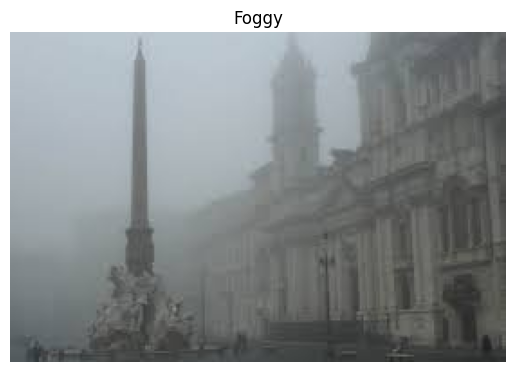

In [8]:

# View a random image from the training dataset
img = view_random_image(target_dir="/content/drive/MyDrive/data/Rome_Weather/Train/",
                        target_class="Foggy")

Image shape: (194, 259, 3)


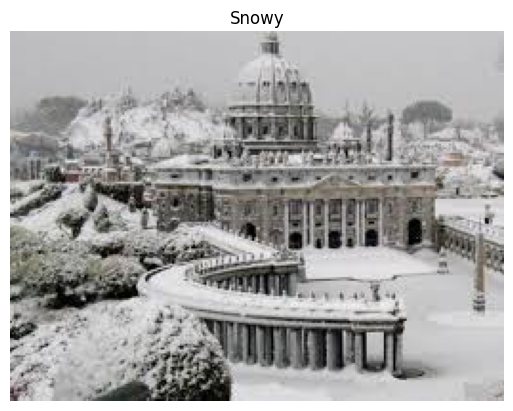

In [9]:
img = view_random_image(target_dir="/content/drive/MyDrive/data/Rome_Weather/Train/",
                        target_class="Snowy")

In [10]:
# View the img (actually just a big array/tensor)
img, img.shape

(array([[[189, 189, 191],
         [189, 189, 191],
         [189, 189, 191],
         ...,
         [200, 200, 202],
         [200, 200, 202],
         [199, 199, 201]],
 
        [[189, 189, 191],
         [189, 189, 191],
         [189, 189, 191],
         ...,
         [199, 199, 201],
         [199, 199, 201],
         [199, 199, 201]],
 
        [[189, 189, 191],
         [189, 189, 191],
         [189, 189, 191],
         ...,
         [198, 198, 200],
         [198, 198, 200],
         [197, 197, 199]],
 
        ...,
 
        [[ 83,  64,  70],
         [ 66,  49,  55],
         [ 75,  58,  64],
         ...,
         [150, 145, 142],
         [147, 142, 139],
         [185, 180, 177]],
 
        [[124, 108, 111],
         [ 99,  84,  87],
         [ 55,  43,  45],
         ...,
         [202, 194, 192],
         [195, 186, 187],
         [188, 179, 180]],
 
        [[117, 103, 103],
         [110,  98,  98],
         [ 69,  57,  59],
         ...,
         [196, 188, 186],
  

## Prepare the Dataset

In [11]:
train_dir = "/content/drive/MyDrive/data/Rome_Weather/Train/"
test_dir = "/content/drive/MyDrive/data/Rome_Weather/Test/"

In [12]:
train_data = image_dataset_from_directory(train_dir,
                                          image_size=IMG_SIZE,
                                          batch_size=BATCH_SIZE,
                                          label_mode="categorical")

test_data = image_dataset_from_directory(test_dir,
                                         image_size=IMG_SIZE,
                                         batch_size=BATCH_SIZE,
                                         label_mode="categorical")

Found 175 files belonging to 5 classes.
Found 75 files belonging to 5 classes.


In [13]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [14]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [15]:
train_data.class_names

['Cloudy', 'Foggy', 'Rainy', 'Snowy', 'Sunny']

In [16]:
# See an example of the batch dataset
for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[240.89732      1.4843756    1.8660722 ]
   [215.10938     30.801338    40.946426  ]
   [215.36162      2.          15.7589245 ]
   ...
   [214.90846      0.84820557  15.758972  ]
   [208.63614     21.819305    20.872772  ]
   [236.72787      1.0601044    0.8904877 ]]

  [[214.51624     36.386845    22.702719  ]
   [218.52347    180.35086    178.8631    ]
   [249.0911     198.72768    199.3287    ]
   ...
   [249.68436    204.04803    194.57349   ]
   [236.5739     178.57062    149.58937   ]
   [220.8835      26.92803     20.502028  ]]

  [[209.693       16.557074    23.684778  ]
   [237.55481    212.43817    228.35805   ]
   [254.701      241.99771    247.53708   ]
   ...
   [241.55463    250.28549    242.14746   ]
   [232.44366    230.1759     200.4364    ]
   [203.83093     26.228458    27.636814  ]]

  ...

  [[129.25447    126.25446    121.25446   ]
   [134.87277    131.87277    126.872765  ]
   [134.4241     131.4241     126.42411   ]
   ...
   [124.75347    121.391

## Model 1: EfficientNetB0 feature extraction model

In [17]:
# 1. Create the base model with tf.keras.application
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If using ResNet50V2, add a rescale layer to the inputs
# x = layers.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model
x = base_model(inputs)

# 6. Average pool the outputs of the base model (aggregate all the important information, reduce number of computation)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# 7. Create the output activation layer
output = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_1 = tf.keras.Model(inputs, output)


16705208/16705208 [==============================] - 0s 0us/step


In [18]:
# Check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [19]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 5)                 6405      
                                                                 
Total params: 4055976 (15.47 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 4049571 (15.45 MB)
___________________

In [20]:
# 9. Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 10. Fit the model
history_model_1 = model_1.fit(train_data,
                              epochs=10,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=len(test_data))

Epoch 1/10
6/6 [==============================] - 13s 744ms/step - loss: 1.5107 - accuracy: 0.3143 - val_loss: 1.3582 - val_accuracy: 0.4933
Epoch 2/10
6/6 [==============================] - 1s 74ms/step - loss: 1.2736 - accuracy: 0.5486 - val_loss: 1.2018 - val_accuracy: 0.5867
Epoch 3/10
6/6 [==============================] - 1s 71ms/step - loss: 1.0875 - accuracy: 0.7314 - val_loss: 1.0852 - val_accuracy: 0.6400
Epoch 4/10
6/6 [==============================] - 1s 75ms/step - loss: 0.9721 - accuracy: 0.7200 - val_loss: 0.9905 - val_accuracy: 0.6400
Epoch 5/10
6/6 [==============================] - 1s 76ms/step - loss: 0.8327 - accuracy: 0.7829 - val_loss: 0.9241 - val_accuracy: 0.6800
Epoch 6/10
6/6 [==============================] - 1s 71ms/step - loss: 0.7614 - accuracy: 0.8000 - val_loss: 0.8756 - val_accuracy: 0.6800
Epoch 7/10
6/6 [==============================] - 1s 75ms/step - loss: 0.6934 - accuracy: 0.8114 - val_loss: 0.8340 - val_accuracy: 0.6933
Epoch 8/10
6/6 [=========

In [21]:
model_1_results = model_1.evaluate(test_data)

3/3 [==============================] - 0s 27ms/step - loss: 0.7533 - accuracy: 0.7067


## MODEL 2: Using the EfficientNetB2 as a `Base Model`

In [22]:
base_model = tf.keras.applications.EfficientNetB2(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

output = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)

model_2 = tf.keras.Model(inputs, output)

31790344/31790344 [==============================] - 0s 0us/step


In [23]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb2 (Functional  (None, None, None, 1408   7768569   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1408)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 5)                 7045      
                                                                 
Total params: 7775614 (29.66 MB)
Trainable params: 7045 (27.52 KB)
Non-trainable params: 7768569 (29.63 MB)
_________________

In [24]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_2
1 rescaling_2
2 normalization_1
3 rescaling_3
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block1b_dwconv
19 block1b_bn
20 block1b_activation
21 block1b_se_squeeze
22 block1b_se_reshape
23 block1b_se_reduce
24 block1b_se_expand
25 block1b_se_excite
26 block1b_project_conv
27 block1b_project_bn
28 block1b_drop
29 block1b_add
30 block2a_expand_conv
31 block2a_expand_bn
32 block2a_expand_activation
33 block2a_dwconv_pad
34 block2a_dwconv
35 block2a_bn
36 block2a_activation
37 block2a_se_squeeze
38 block2a_se_reshape
39 block2a_se_reduce
40 block2a_se_expand
41 block2a_se_excite
42 block2a_project_conv
43 block2a_project_bn
44 block2b_expand_conv
45 block2b_expand_bn
46 block2b_expand_activation
47 block2b_dwconv
48 block2b_bn
49 block2b_activation
50 block2b_se_sq

In [25]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_model_2 = model_2.fit(train_data,
                              epochs=10,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=len(test_data))

Epoch 1/10
6/6 [==============================] - 12s 503ms/step - loss: 1.5849 - accuracy: 0.2457 - val_loss: 1.3999 - val_accuracy: 0.4267
Epoch 2/10
6/6 [==============================] - 1s 94ms/step - loss: 1.3052 - accuracy: 0.5657 - val_loss: 1.2577 - val_accuracy: 0.5867
Epoch 3/10
6/6 [==============================] - 1s 94ms/step - loss: 1.1579 - accuracy: 0.6857 - val_loss: 1.1372 - val_accuracy: 0.6667
Epoch 4/10
6/6 [==============================] - 1s 93ms/step - loss: 1.0247 - accuracy: 0.7314 - val_loss: 1.0315 - val_accuracy: 0.7467
Epoch 5/10
6/6 [==============================] - 1s 89ms/step - loss: 0.9146 - accuracy: 0.7943 - val_loss: 0.9556 - val_accuracy: 0.7600
Epoch 6/10
6/6 [==============================] - 1s 92ms/step - loss: 0.8279 - accuracy: 0.7829 - val_loss: 0.8974 - val_accuracy: 0.7867
Epoch 7/10
6/6 [==============================] - 1s 94ms/step - loss: 0.7531 - accuracy: 0.8000 - val_loss: 0.8513 - val_accuracy: 0.7467
Epoch 8/10
6/6 [=========

In [26]:
model_2_result = model_2.evaluate(test_data)

3/3 [==============================] - 0s 36ms/step - loss: 0.7580 - accuracy: 0.7867


## MODEL 3: EfficientNetB2 with Data Augmentation Layer

In [27]:
tf.random.set_seed(42)

In [76]:
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.08),
    preprocessing.RandomZoom(0.08),
    preprocessing.RandomHeight(0.08),
    preprocessing.RandomWidth(0.08),
    # preprocessing.Rescaling(1./255) # Keep for models like ResNet50V2 but EfficientNet's having resclaing built-in

],name="data_augmentation_layer")

In [77]:
base_model = tf.keras.applications.EfficientNetB3(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = data_augmentation(inputs)

x= base_model(x)

x= tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
output = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)

model_3 = tf.keras.Model(inputs, output)

43941136/43941136 [==============================] - 0s 0us/step


In [78]:
model_3.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (S  (None, None, None, 3)     0         
 equential)                                                      
                                                                 
 efficientnetb3 (Functional  (None, None, None, 1536   10783535  
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1536)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 5)                 7685

In [79]:
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_model_3= model_3.fit(train_data,
                              epochs=10,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=len(test_data))

Epoch 1/10
6/6 [==============================] - 14s 683ms/step - loss: 1.6698 - accuracy: 0.2057 - val_loss: 1.4440 - val_accuracy: 0.4400
Epoch 2/10
6/6 [==============================] - 1s 193ms/step - loss: 1.4066 - accuracy: 0.4286 - val_loss: 1.2732 - val_accuracy: 0.5600
Epoch 3/10
6/6 [==============================] - 1s 181ms/step - loss: 1.1908 - accuracy: 0.6286 - val_loss: 1.1472 - val_accuracy: 0.5867
Epoch 4/10
6/6 [==============================] - 1s 197ms/step - loss: 1.0721 - accuracy: 0.6743 - val_loss: 1.0516 - val_accuracy: 0.6533
Epoch 5/10
6/6 [==============================] - 1s 201ms/step - loss: 0.9269 - accuracy: 0.7714 - val_loss: 0.9820 - val_accuracy: 0.6667
Epoch 6/10
6/6 [==============================] - 1s 199ms/step - loss: 0.8481 - accuracy: 0.7486 - val_loss: 0.9301 - val_accuracy: 0.7067
Epoch 7/10
6/6 [==============================] - 1s 197ms/step - loss: 0.7485 - accuracy: 0.8114 - val_loss: 0.8902 - val_accuracy: 0.6667
Epoch 8/10
6/6 [===

In [61]:
model_3_result = model_3.evaluate(test_data)

3/3 [==============================] - 0s 37ms/step - loss: 0.8073 - accuracy: 0.8000


## MODEL 4: resnet50

In [33]:
# we have to change the data_aug ,because resnet50 don't have build in rescaling layer

data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.08),
    preprocessing.RandomZoom(0.08),
    preprocessing.RandomHeight(0.08),
    preprocessing.RandomWidth(0.08),
    preprocessing.Rescaling(1./255) # Keep for models like ResNet50V2 but EfficientNet's having resclaing built-in

],name="data_augmentation_layer")

In [34]:
# 1. Create the base model with tf.keras.application
base_model = tf.keras.applications.ResNet50(include_top=False)
# 2. Freeze the base model (so the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False
# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If using ResNet50V2, add a rescale layer to the inputs
x = tf.keras.layers.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model
x= base_model(x)

# 6. Average pool the outputs of the base model (aggregate all the important information, reduce number of computation)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# 7. Create the output activation layer
output = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_4 = tf.keras.Model(inputs, output)


94765736/94765736 [==============================] - 1s 0us/step


In [35]:
model_4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_7 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling_lay  (None, 2048)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 5)                 10245     
                                                           

In [36]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_4
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [37]:


model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_model_4= model_4.fit(train_data,
                              epochs=10,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=len(test_data))

Epoch 1/10
6/6 [==============================] - 7s 560ms/step - loss: 1.6094 - accuracy: 0.2171 - val_loss: 1.6117 - val_accuracy: 0.1600
Epoch 2/10
6/6 [==============================] - 1s 90ms/step - loss: 1.6139 - accuracy: 0.1657 - val_loss: 1.5690 - val_accuracy: 0.1867
Epoch 3/10
6/6 [==============================] - 1s 100ms/step - loss: 1.5625 - accuracy: 0.3200 - val_loss: 1.5616 - val_accuracy: 0.3733
Epoch 4/10
6/6 [==============================] - 1s 94ms/step - loss: 1.5623 - accuracy: 0.3429 - val_loss: 1.5455 - val_accuracy: 0.3467
Epoch 5/10
6/6 [==============================] - 1s 92ms/step - loss: 1.5246 - accuracy: 0.3771 - val_loss: 1.5269 - val_accuracy: 0.4000
Epoch 6/10
6/6 [==============================] - 1s 95ms/step - loss: 1.5226 - accuracy: 0.3543 - val_loss: 1.5160 - val_accuracy: 0.3867
Epoch 7/10
6/6 [==============================] - 1s 91ms/step - loss: 1.5066 - accuracy: 0.3886 - val_loss: 1.5015 - val_accuracy: 0.4533
Epoch 8/10
6/6 [=========

In [38]:
model_4_result = model_4.evaluate(test_data)

3/3 [==============================] - 0s 38ms/step - loss: 1.4774 - accuracy: 0.3600


## MODEL 5: MobileNet

In [39]:
base_model = tf.keras.applications.MobileNet(include_top=False)

base_model.trainable= False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = tf.keras.layers.Rescaling(1./255)(inputs)

x = base_model(x)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

output = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)

model_5 = tf.keras.Model(inputs, output)

17225924/17225924 [==============================] - 0s 0us/step


In [40]:
model_5.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_8 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 mobilenet_1.00_224 (Functi  (None, None, None, 1024   3228864   
 onal)                       )                                   
                                                                 
 global_average_pooling_lay  (None, 1024)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 5)                 5125      
                                                           

In [41]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_5
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

In [42]:
model_5.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_model_5= model_5.fit(train_data,
                              epochs=10,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=len(test_data))

Epoch 1/10
6/6 [==============================] - 3s 154ms/step - loss: 2.0944 - accuracy: 0.2057 - val_loss: 1.8051 - val_accuracy: 0.3333
Epoch 2/10
6/6 [==============================] - 0s 51ms/step - loss: 1.6201 - accuracy: 0.3543 - val_loss: 1.5620 - val_accuracy: 0.3200
Epoch 3/10
6/6 [==============================] - 0s 52ms/step - loss: 1.3638 - accuracy: 0.4686 - val_loss: 1.3705 - val_accuracy: 0.4000
Epoch 4/10
6/6 [==============================] - 0s 50ms/step - loss: 1.1167 - accuracy: 0.5086 - val_loss: 1.2530 - val_accuracy: 0.5067
Epoch 5/10
6/6 [==============================] - 0s 52ms/step - loss: 0.9725 - accuracy: 0.6171 - val_loss: 1.1671 - val_accuracy: 0.5733
Epoch 6/10
6/6 [==============================] - 0s 51ms/step - loss: 0.8293 - accuracy: 0.7143 - val_loss: 1.0665 - val_accuracy: 0.6667
Epoch 7/10
6/6 [==============================] - 0s 51ms/step - loss: 0.7326 - accuracy: 0.7543 - val_loss: 1.0087 - val_accuracy: 0.6667
Epoch 8/10
6/6 [==========

In [43]:
model_5_result = model_5.evaluate(test_data)

3/3 [==============================] - 0s 18ms/step - loss: 0.9111 - accuracy: 0.6800


## MODEL 6: MobileNet with Data Augmentation

In [44]:
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.15),
    preprocessing.RandomZoom(0.15),
    preprocessing.RandomHeight(0.15),
    preprocessing.RandomWidth(0.15),
    preprocessing.Rescaling(1./255) # Keep for models like ResNet50V2 but EfficientNet's having resclaing built-in

],name="data_augmentation_layer")

In [45]:
base_model = tf.keras.applications.MobileNet(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = data_augmentation(inputs)

x= base_model(x)

x= tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
output = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)

model_6 = tf.keras.Model(inputs, output)

In [46]:
model_6.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (S  (None, None, None, 3)     0         
 equential)                                                      
                                                                 
 mobilenet_1.00_224 (Functi  (None, None, None, 1024   3228864   
 onal)                       )                                   
                                                                 
 global_average_pooling_lay  (None, 1024)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 5)                 5125

In [47]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_6
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

In [48]:
model_6.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_model_6= model_6.fit(train_data,
                              epochs=10,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=len(test_data))

Epoch 1/10
6/6 [==============================] - 4s 231ms/step - loss: 1.9477 - accuracy: 0.2000 - val_loss: 1.7015 - val_accuracy: 0.3067
Epoch 2/10
6/6 [==============================] - 1s 127ms/step - loss: 1.5324 - accuracy: 0.3486 - val_loss: 1.4571 - val_accuracy: 0.3867
Epoch 3/10
6/6 [==============================] - 1s 125ms/step - loss: 1.4409 - accuracy: 0.3886 - val_loss: 1.3243 - val_accuracy: 0.4533
Epoch 4/10
6/6 [==============================] - 1s 128ms/step - loss: 1.2746 - accuracy: 0.4800 - val_loss: 1.2036 - val_accuracy: 0.5333
Epoch 5/10
6/6 [==============================] - 1s 166ms/step - loss: 1.0941 - accuracy: 0.5371 - val_loss: 1.1031 - val_accuracy: 0.5467
Epoch 6/10
6/6 [==============================] - 1s 121ms/step - loss: 0.9830 - accuracy: 0.6400 - val_loss: 1.0349 - val_accuracy: 0.5733
Epoch 7/10
6/6 [==============================] - 1s 119ms/step - loss: 0.9453 - accuracy: 0.6571 - val_loss: 0.9601 - val_accuracy: 0.6400
Epoch 8/10
6/6 [====

In [49]:
model_6_result = model_6.evaluate(test_data)

3/3 [==============================] - 0s 16ms/step - loss: 0.8326 - accuracy: 0.6267


## MODEL 7: VGG-16

In [50]:
base_model = tf.keras.applications.VGG16(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

output = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)

model_7 = tf.keras.Model(inputs, output)

58889256/58889256 [==============================] - 0s 0us/step


In [51]:
model_7.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling_lay  (None, 512)               0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 5)                 2565      
                                                                 
Total params: 14717253 (56.14 MB)
Trainable params: 2565 (10.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [52]:
model_7.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_model_7 =model_7.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10
6/6 [==============================] - 11s 1s/step - loss: 7.7860 - accuracy: 0.2057 - val_loss: 5.9703 - val_accuracy: 0.2933
Epoch 2/10
6/6 [==============================] - 1s 149ms/step - loss: 4.9971 - accuracy: 0.2629 - val_loss: 5.4182 - val_accuracy: 0.2533
Epoch 3/10
6/6 [==============================] - 1s 151ms/step - loss: 4.5394 - accuracy: 0.2629 - val_loss: 4.8824 - val_accuracy: 0.2133
Epoch 4/10
6/6 [==============================] - 1s 151ms/step - loss: 3.7684 - accuracy: 0.3257 - val_loss: 3.9375 - val_accuracy: 0.3067
Epoch 5/10
6/6 [==============================] - 1s 152ms/step - loss: 3.0094 - accuracy: 0.4114 - val_loss: 3.3816 - val_accuracy: 0.3467
Epoch 6/10
6/6 [==============================] - 1s 148ms/step - loss: 2.5494 - accuracy: 0.4457 - val_loss: 2.9280 - val_accuracy: 0.4000
Epoch 7/10
6/6 [==============================] - 1s 151ms/step - loss: 2.1460 - accuracy: 0.5257 - val_loss: 2.5312 - val_accuracy: 0.4667
Epoch 8/10
6/6 [======

In [53]:
model_7_result = model_7.evaluate(test_data)

3/3 [==============================] - 0s 67ms/step - loss: 1.8862 - accuracy: 0.5467


# Results

In [62]:
results = pd.DataFrame({"Models": ["Model 1: EfficientNetB0", "Model 2: EfficientNetB2", "Model 3: EfficientNetB0 with Data Augmentation",
                         "Model 4: ResNet50", "Model 5: MobileNet", "Model 6: MobileNet with Data Augmentation ", "Model 7: VGG-16"],
              "Results":[model_1_results[1], model_2_result[1], model_3_result[1], model_4_result[1], model_5_result[1], model_6_result[1], model_7_result[1]]})

In [63]:
results

,Models,Results
0,Model 1: EfficientNetB0,0.706667
1,Model 2: EfficientNetB2,0.786667
2,Model 3: EfficientNetB0 with Data Augmentation,0.800000
3,Model 4: ResNet50,0.360000
4,Model 5: MobileNet,0.680000
5,Model 6: MobileNet with Data Augmentation,0.626667
6,Model 7: VGG-16,0.546667


# Making Prediction with the `Best Model`

In [86]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)
  print(f"before scaling:{img.shape}")
  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  print(f"after scaling:{img.shape}")
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [87]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)
  # Get the predicted class
  pred_class = class_names[int(tf.argmax(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [88]:
!wget https://i.pinimg.com/564x/c5/e8/4f/c5e84f3063fdd51ad320cfdc12230e97.jpg

--2024-04-16 09:53:09--  https://i.pinimg.com/564x/c5/e8/4f/c5e84f3063fdd51ad320cfdc12230e97.jpg
Resolving i.pinimg.com (i.pinimg.com)... 173.222.162.174, 173.222.162.156, 173.222.162.158, ...
Connecting to i.pinimg.com (i.pinimg.com)|173.222.162.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103628 (101K) [image/jpeg]
Saving to: ‘c5e84f3063fdd51ad320cfdc12230e97.jpg.1’

c5e84f3063fdd51ad32 100%[===================>] 101.20K  --.-KB/s    in 0.02s   

2024-04-16 09:53:09 (5.52 MB/s) - ‘c5e84f3063fdd51ad320cfdc12230e97.jpg.1’ saved [103628/103628]



In [89]:
train_data.class_names

['Cloudy', 'Foggy', 'Rainy', 'Snowy', 'Sunny']

before scaling:(1002, 564, 3)
after scaling:(224, 224, 3)
1/1 [==============================] - 0s 31ms/step
[[0.3647184  0.21563426 0.2132362  0.06714004 0.13927108]]


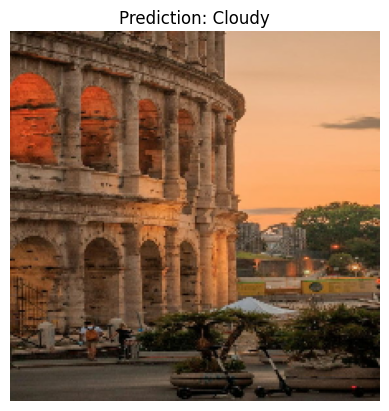

In [90]:
pred_and_plot(model_2, "c5e84f3063fdd51ad320cfdc12230e97.jpg", train_data.class_names)

In [69]:
!wget https://i.pinimg.com/564x/0a/5e/e1/0a5ee1bc3bb5ee62ad564ab6cfc805a0.jpg

--2024-04-16 09:49:37--  https://i.pinimg.com/564x/0a/5e/e1/0a5ee1bc3bb5ee62ad564ab6cfc805a0.jpg
Resolving i.pinimg.com (i.pinimg.com)... 146.75.92.84, 2a04:4e42:87::84
Connecting to i.pinimg.com (i.pinimg.com)|146.75.92.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65623 (64K) [image/jpeg]
Saving to: ‘0a5ee1bc3bb5ee62ad564ab6cfc805a0.jpg’

0a5ee1bc3bb5ee62ad5 100%[===================>]  64.08K  --.-KB/s    in 0.008s  

2024-04-16 09:49:37 (7.80 MB/s) - ‘0a5ee1bc3bb5ee62ad564ab6cfc805a0.jpg’ saved [65623/65623]



In [70]:
train_data.class_names

['Cloudy', 'Foggy', 'Rainy', 'Snowy', 'Sunny']

before scaling:()
before scaling:(224, 224, 3)
1/1 [==============================] - 0s 30ms/step
[[0.36399972 0.21587788 0.21366803 0.06698181 0.13947259]]


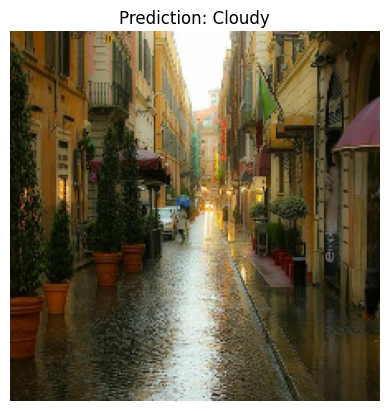

In [81]:
pred_and_plot(model_2, "0a5ee1bc3bb5ee62ad564ab6cfc805a0.jpg", train_data.class_names)

In [95]:
!wget https://www.romewise.com/images/snow-colosseum-small.jpeg

--2024-04-16 09:55:29--  https://www.romewise.com/images/snow-colosseum-small.jpeg
Resolving www.romewise.com (www.romewise.com)... 173.247.218.50
Connecting to www.romewise.com (www.romewise.com)|173.247.218.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67120 (66K) [image/jpeg]
Saving to: ‘snow-colosseum-small.jpeg.1’

snow-colosseum-smal 100%[===================>]  65.55K  --.-KB/s    in 0.07s   

2024-04-16 09:55:30 (944 KB/s) - ‘snow-colosseum-small.jpeg.1’ saved [67120/67120]



In [93]:
train_data.class_names

['Cloudy', 'Foggy', 'Rainy', 'Snowy', 'Sunny']

before scaling:(224, 336, 3)
after scaling:(224, 224, 3)
1/1 [==============================] - 0s 40ms/step
[[0.36914256 0.29294533 0.13774279 0.05531485 0.1448545 ]]


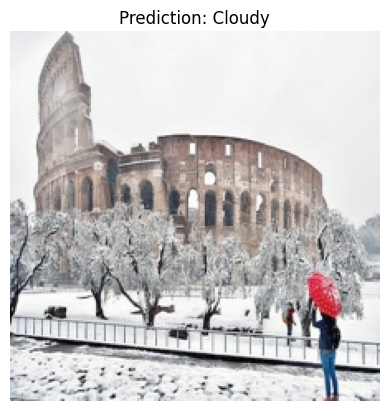

In [96]:
pred_and_plot(model_3, "snow-colosseum-small.jpeg", train_data.class_names)

# Save the model

In [114]:
model_3.save("rome_weather.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
